In [80]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

In [81]:
df = pd.read_csv('new_insurance_data.csv')
df.sample(4)

,age,sex,bmi,children,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,region,charges
576,47.0,male,36.20,1.0,no,15076.51672,5.0,899410.0,9.918298e+06,1.0,128188706.2,southwest,8068.18500
466,40.0,female,27.40,1.0,no,49137.95753,20.0,874670.0,2.849695e+05,1.0,54203583.7,southwest,6496.88600
532,43.0,female,35.64,1.0,no,15325.13526,8.0,888781.0,9.032170e+06,1.0,133364390.3,southeast,7345.72660
1126,54.0,male,30.02,0.0,no,37385.45533,26.0,1029035.0,1.579127e+07,2.0,686309317.3,northwest,24476.47851


In [82]:
df.shape

(1338, 13)

In [83]:
df.duplicated().sum()

0

In [84]:
df.isnull().sum()

age                                 9
sex                                 0
bmi                                 3
children                            5
smoker                              0
Claim_Amount                       14
past_consultations                  6
num_of_steps                        3
Hospital_expenditure                4
NUmber_of_past_hospitalizations     2
Anual_Salary                        6
region                              0
charges                             0
dtype: int64

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   age                              1329 non-null   float64
 1   sex                              1338 non-null   object 
 2   bmi                              1335 non-null   float64
 3   children                         1333 non-null   float64
 4   smoker                           1338 non-null   object 
 5   Claim_Amount                     1324 non-null   float64
 6   past_consultations               1332 non-null   float64
 7   num_of_steps                     1335 non-null   float64
 8   Hospital_expenditure             1334 non-null   float64
 9   NUmber_of_past_hospitalizations  1336 non-null   float64
 10  Anual_Salary                     1332 non-null   float64
 11  region                           1338 non-null   object 
 12  charges             

In [86]:
df['age'] = df['age'].fillna(df['age'].mean())
df['bmi'] = df['bmi'].fillna(df['bmi'].mean())
df['Claim_Amount']=df['Claim_Amount'].fillna(df['Claim_Amount'].mean())
df['past_consultations']=df['past_consultations'].fillna(df['past_consultations'].median())
df['children']=df['children'].fillna(df['children'].median())
df['num_of_steps'] = df['num_of_steps'].fillna(df['num_of_steps'].mean())
df['Hospital_expenditure']=df['Hospital_expenditure'].fillna(df['Hospital_expenditure'].mean())            
df['NUmber_of_past_hospitalizations']=df['NUmber_of_past_hospitalizations'].fillna(df['NUmber_of_past_hospitalizations'].median())
df['Anual_Salary']=df['Anual_Salary'].fillna(df['Anual_Salary'].mean())

In [87]:
df.isnull().sum()

age                                0
sex                                0
bmi                                0
children                           0
smoker                             0
Claim_Amount                       0
past_consultations                 0
num_of_steps                       0
Hospital_expenditure               0
NUmber_of_past_hospitalizations    0
Anual_Salary                       0
region                             0
charges                            0
dtype: int64

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

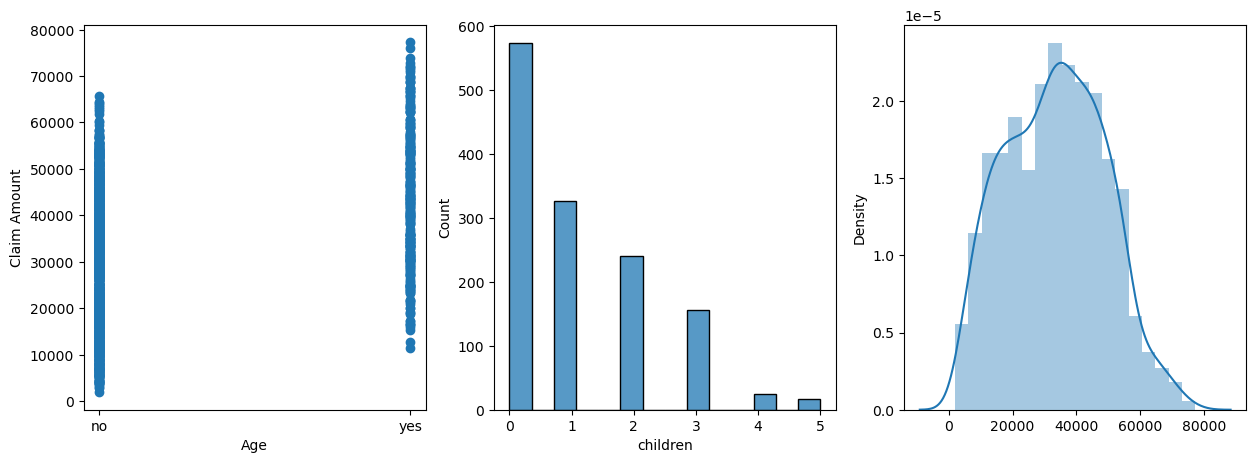

In [89]:
plt.subplots(1,3,figsize=(15,5))
plt.subplot(1,3,1)
plt.scatter(df['smoker'],df['Claim_Amount'])
plt.xlabel('Age')
plt.ylabel('Claim Amount')


plt.subplot(1,3,2)
sns.histplot(x=df['children'])

plt.subplot(1,3,3)
sns.distplot(x=df['Claim_Amount'])

plt.show()

In [90]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'Claim_Amount',
       'past_consultations', 'num_of_steps', 'Hospital_expenditure',
       'NUmber_of_past_hospitalizations', 'Anual_Salary', 'region', 'charges'],
      dtype='object')

In [91]:
for i in df.columns:
    if df[i].dtype =='object':
        df[i] = le.fit_transform(df[i])

In [92]:
df1 = df.sample(500)

<Axes: >

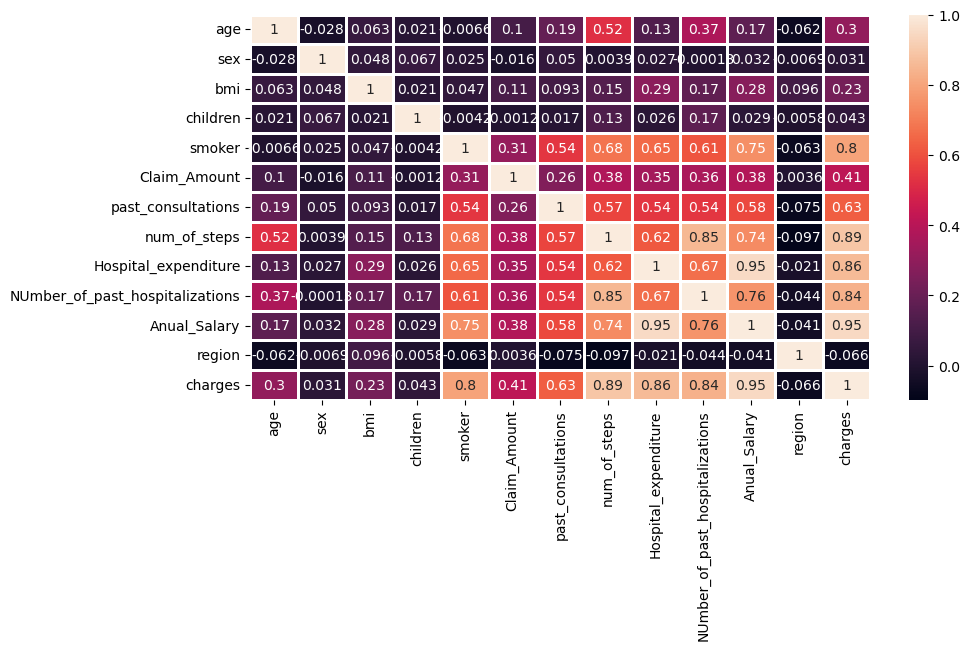

In [93]:
plt.figure(figsize=(10,5))
sns.heatmap(df1.corr(),annot=True,linewidths=1)

In [94]:
df = df.drop(['age','sex','bmi','children','region'],axis=1)
df

,smoker,Claim_Amount,past_consultations,num_of_steps,Hospital_expenditure,NUmber_of_past_hospitalizations,Anual_Salary,charges
0,0,29087.54313,17.0,715428.0,4.720921e+06,0.0,5.578497e+07,1121.87390
1,0,39053.67437,7.0,699157.0,4.329832e+06,0.0,1.370089e+07,1131.50660
2,0,39023.62759,19.0,702341.0,6.884861e+06,0.0,7.352311e+07,1135.94070
3,0,28185.39332,11.0,700250.0,4.274774e+06,0.0,7.581968e+07,1136.39940
4,0,14697.85941,16.0,711584.0,3.787294e+06,0.0,2.301232e+07,1137.01100
...,...,...,...,...,...,...,...,...
1333,1,63142.25346,32.0,1091267.0,1.703805e+08,2.0,3.101107e+09,55135.40209
1334,1,43419.95227,31.0,1107872.0,2.015152e+08,2.0,3.484216e+09,58571.07448
1335,1,52458.92353,25.0,1092005.0,2.236450e+08,2.0,3.640807e+09,60021.39897
1336,1,69927.51664,34.0,1106821.0,2.528924e+08,3.0,4.006359e+09,62592.87309


In [95]:
df.sample(3)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [96]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.1,random_state=0)

In [97]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [98]:
X_train = sc.fit_transform(Xtrain)
X_test = sc.transform(Xtest)

In [99]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [100]:
lr.fit(X_train,ytrain)

LinearRegression()

In [101]:
y_pred = lr.predict(X_test)

In [102]:
X = np.reshape(y_pred,(len(y_pred),1))
Y = np.reshape(ytest,(len(ytest),1))

In [103]:
from sklearn.metrics import r2_score

In [104]:
r2_score(ytest,y_pred)

0.9896938586356714

In [105]:
print(np.concatenate((X,Y),1))

[[ 9295.46013388  8116.26885   ]
 [ 9949.44137007  8534.6718    ]
 [ 9297.52660509  7986.47525   ]
 [18777.65719962 18648.4217    ]
 [ 2376.58269029  3161.454     ]
 [14567.52784626 15019.76005   ]
 [-1465.35935854  1628.4709    ]
 [39193.19099378 39836.519     ]
 [35938.3217474  36397.576     ]
 [48295.60565359 47896.79135   ]
 [ 8023.94169807  8547.6913    ]
 [20454.69141256 22493.65964   ]
 [40255.35936891 40419.0191    ]
 [ 5804.40140356  5630.45785   ]
 [12586.45544995 11353.2276    ]
 [12960.93506705 14451.83515   ]
 [11871.16661046 11741.726     ]
 [ 2219.78717199  2457.21115   ]
 [26793.32332558 29186.48236   ]
 [16899.0000649  18963.17192   ]
 [14466.6158302  14410.9321    ]
 [ 8197.6301561   6500.2359    ]
 [19956.04291075 21984.47061   ]
 [11635.83016186 10796.35025   ]
 [22064.70211876 21978.6769    ]
 [ 5866.75225491  4561.1885    ]
 [42227.2693736  43254.41795   ]
 [ 6788.9620703   6402.29135   ]
 [ 3096.31717541  1137.4697    ]
 [ 8004.48425304  7173.35995   ]
 [  180.58

# Linear Regression Model producing R2 Score of 99% accuracy..Very Good Model lets try other models too


In [106]:
# Polynomial Model will be using for Non-Linear Datasets but we are try here for seeing how it will perfrom

In [107]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.1,random_state=0)

ValueError: Found input variables with inconsistent numbers of samples: [134, 1338]

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)

In [ ]:
Xtrain = pf.fit_transform(Xtrain)
Xtest = pf.transform(Xtest)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(Xtrain,ytrain)

In [ ]:
ypred = lr.predict(Xtest)

In [ ]:
r2_score(ytest,y_pred)

In [ ]:
np.round(ytest)

In [ ]:
Polynomial Regression Model producing R2 Score of 99% accuracy..Very Good Model lets try other models too

# SVR---support vector Regressor model


In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.1,random_state=0)

In [ ]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [ ]:
ytrain = np.reshape(ytrain,(len(ytrain),1))
ytest = np.reshape(ytest,(len(ytest),1))

In [ ]:
X_train = sc_X.fit_transform(Xtrain)
X_test = sc_X.transform(Xtest)
y_train = sc_y.fit_transform(ytrain)
y_test = sc_y.transform(ytest)

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='rbf')

In [ ]:
model.fit(X_train,y_train)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
r2_score(y_test,y_pred)

In [ ]:
## SVR Model producing R2 Score of 100% accuracy..Very Good Model lets try other models too

# Decision Tree Model---support vector Regressor model

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.1,random_state=0)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)

In [ ]:
dt.fit(Xtrain,ytrain)

In [ ]:
ypred=dt.predict(Xtest)

In [ ]:
r2_score(ytest,ypred)

In [ ]:
## Decision Tree Model producing R2 Score of 100% accuracy..Very Good Model lets try other models too

In [ ]:
## Random forest Model---support vector Regressor model

In [ ]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y,test_size=.1,random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10,random_state=0)

In [ ]:
rf.fit(Xtrain,ytrain)

In [ ]:
ypred=rf.predict(Xtest)

In [ ]:
r2_score(ytest,ypred)

In [ ]:
## RandomForest Model producing R2 Score of 100% accuracy..Very Good Model lets try other models too

In [ ]:
# Conclusion
# RandomForest Model Producing higest level of Accuracy